# Table of Contents
-Import libraries and data

-Address PII

-Compute region variable and analyze spend habits

-Create low-activity exclusion flag and exclude that group

-Create profiling variable to analyze customer order habits

-Produce visualizations to illustrate results

-Export final data

# Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Remember project folder file path
path = r'C:\Users\rstev\Documents\03_22 Instacart Basket Analysis'

In [3]:
# Import merged dataframe (used before filtering down the data in later step)
ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_small.pkl'))

In [3]:
# Import merged dataframe (use this line to run analyses on the filtered normal activity data)
df_normal_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_subset.pkl'))

# Part 1 of 4.10 Python fundamentals achievement

## 2. Consider any security implications that might exist

In [4]:
# Address any PII data before continuing analysis
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### We have first name and last name in our data, so I would consult with my senior colleague or client on how to handle this. I will be leaving in for the purpose of this project, but noting it would need to be addressed.

## 3. Create a region column in the data to review customer behavior by region.

In [5]:
# First, creating list of region labels using for-loop with if-statements
region = []

for value in ords_prods_cust_merged['State']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [ ]:
region

In [7]:
# Now creating the new column
ords_prods_cust_merged['region'] = region

In [8]:
# Check region value counts
ords_prods_cust_merged['region'].value_counts(dropna = False)

South        3331508
West         2564226
Midwest      2341772
Northeast    1762494
Name: region, dtype: int64

In [ ]:
# Verify the region counts match with the state variable (confirmed this in excel)
ords_prods_cust_merged['State'].value_counts(dropna = False)

In [10]:
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,median_order_frequency,order_freq_flag,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [11]:
# Now crossing region with spending flag
crosstab_1 = pd.crosstab(ords_prods_cust_merged['region'], ords_prods_cust_merged['spend_flag'], dropna = False)

In [12]:
crosstab_1

spend_flag,High spender,Low spender
region,,
Midwest,31896,2309876
Northeast,21512,1740982
South,44881,3286627
West,33793,2530433


In [13]:
# Computing percentages of high spenders per region
Midwest = (31896 / (31896+2309875)) * 100
Northeast = (21512 / (21512+1740982)) * 100
South = (44881 / (44881+3286627)) * 100
West = (33793 / (33793+2530433)) * 100

In [14]:
Midwest, Northeast, South, West

(1.3620460753848262, 1.2205431621327505, 1.347167709037469, 1.3178635580483156)

### Spend is comparable across regions, with the Midwest having slightly more high spenders, and the northeast having the fewest.

## 4. Create an exclusion flag for low-activity customers (less than 5 orders) and exclude them from data

In [15]:
# Creating low activity flag for <5 orders
ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [16]:
# Creating normal to high activity flag for >=5 orders
ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] >= 5, 'activity_flag'] = 'Normal to high activity'

In [17]:
# Check the counts in this variable
ords_prods_cust_merged['activity_flag'].value_counts(dropna = False)

Normal to high activity    9597356
Low activity                402644
Name: activity_flag, dtype: int64

In [18]:
# Now create two subset dataframes 
df_low_activity = ords_prods_cust_merged[ords_prods_cust_merged['activity_flag']=='Low activity']

In [19]:
df_normal_activity = ords_prods_cust_merged[ords_prods_cust_merged['activity_flag']=='Normal to high activity']

In [20]:
# Check the max order number within each dataframe
df_low_activity['max_order'].value_counts(dropna = False)

4    211506
3    191136
2         2
Name: max_order, dtype: int64

In [ ]:
df_normal_activity['max_order'].value_counts(dropna = False)

In [29]:
# Export both dataframes for future use
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_subset.pkl'))

In [47]:
df_normal_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity_subset.pkl'))

## 5. Customer profiling using age, income, certain goods, number of dependants

In [43]:
# First, I'll review the frequencies of the variables we're interested in profiling, then create profile groups.
df_normal_activity.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,median_order_frequency,order_freq_flag,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_bucketed,income_bucketed,parents,profile_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent


In [ ]:
pd.set_option("display.max_rows", None)
df_normal_activity['Age'].value_counts(dropna = False).sort_index()

In [5]:
df_normal_activity['marital_status'].value_counts(dropna = False)

married                             6737973
single                              1583055
divorced/widowed                     820430
living with parents and siblings     455898
Name: marital_status, dtype: int64

In [6]:
df_normal_activity['number_of_dependants'].value_counts(dropna = False).sort_index()

0    2403485
1    2384946
2    2391713
3    2417212
Name: number_of_dependants, dtype: int64

In [7]:
df_normal_activity[['Age','number_of_dependants','income']].mean()

Age                        49.461963
number_of_dependants        1.502498
income                  99955.225882
dtype: float64

In [18]:
# Creating new variables with age, income, and parent buckets
# Age
age_bucketed = []

for value in df_normal_activity['Age']:
    if (value <= 41): 
        age_bucketed.append('Gen Z/Millennial 18-41')
    elif (value >= 42) & (value <= 57):
        age_bucketed.append('Gen X 42-57')
    elif (value >= 58):
        age_bucketed.append('Boomers 58+')

In [ ]:
age_bucketed

In [19]:
# Add result as new column and confirm buckets with original age value count in excel
df_normal_activity['age_bucketed'] = age_bucketed

In [20]:
df_normal_activity['age_bucketed'].value_counts(dropna = False)

Gen Z/Millennial 18-41    3600347
Boomers 58+               3575853
Gen X 42-57               2421156
Name: age_bucketed, dtype: int64

In [11]:
# Income buckets
df_normal_activity['income'].describe()

count    9.597356e+06
mean     9.995523e+04
std      4.064946e+04
min      2.590300e+04
25%      6.872400e+04
50%      9.730300e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

In [27]:
income_bucketed = []

for value in df_normal_activity['income']:
    if (value < 50000): 
        income_bucketed.append('1. Less than $50K')
    elif (value >= 50000) & (value < 100000):
        income_bucketed.append('2. $50K to less than $100K')
    elif (value >= 100000) & (value < 150000):
        income_bucketed.append('3. $100K to less than $150K')
    else:
        income_bucketed.append('4. $150K or more')

In [28]:
income_bucketed

['1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less than $50K',
 '1. Less 

In [29]:
# Add result as new column and confirm buckets with original income values
df_normal_activity['income_bucketed'] = income_bucketed

In [31]:
df_normal_activity['income_bucketed'].value_counts(dropna = False).sort_index()

1. Less than $50K               905709
2. $50K to less than $100K     4233468
3. $100K to less than $150K    3267839
4. $150K or more               1190340
Name: income_bucketed, dtype: int64

In [15]:
# Parents
parents = []

for value in df_normal_activity['number_of_dependants']:
    if (value == 0): 
        parents.append('Not Parent')
    elif (value > 0):
        parents.append('Parent')

In [ ]:
parents

In [16]:
# Add result as new column and confirm buckets with original # of dependant values
df_normal_activity['parents'] = parents

In [17]:
df_normal_activity['parents'].value_counts(dropna = False)

Parent        7193871
Not Parent    2403485
Name: parents, dtype: int64

In [26]:
# Now creating customer profiles based on bucketed age and parental status. I will review differences by income separately as that would create two many profiles if included with age and parental status.
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Gen Z/Millennial 18-41') & (df_normal_activity['parents'] == 'Not Parent'), 'profile_loc'] = 'Young Non-Parent'
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Gen Z/Millennial 18-41') & (df_normal_activity['parents'] == 'Parent'), 'profile_loc'] = 'Young Parent'
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Gen X 42-57') & (df_normal_activity['parents'] == 'Not Parent'), 'profile_loc'] = 'Middle-Age Non-Parent'
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Gen X 42-57') & (df_normal_activity['parents'] == 'Parent'), 'profile_loc'] = 'Middle-Age Parent'
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Boomers 58+') & (df_normal_activity['parents'] == 'Not Parent'), 'profile_loc'] = 'Elder Non-Parent'
df_normal_activity.loc[(df_normal_activity['age_bucketed'] == 'Boomers 58+') & (df_normal_activity['parents'] == 'Parent'), 'profile_loc'] = 'Elder Parent'

In [28]:
df_normal_activity['profile_loc'].value_counts(dropna = False).sort_index()

Elder Non-Parent          903544
Elder Parent             2672309
Middle-Age Non-Parent     598658
Middle-Age Parent        1822498
Young Non-Parent          901283
Young Parent             2699064
Name: profile_loc, dtype: int64

In [37]:
pd.set_option('display.max_columns', None)
df_normal_activity.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spend_flag,median_order_frequency,order_freq_flag,First Name,Last Name,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_bucketed,income_bucketed,parents,profile_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Normal to high activity,Gen Z/Millennial 18-41,<$50K,Parent,Young Parent


## 6. Distribution of profiles

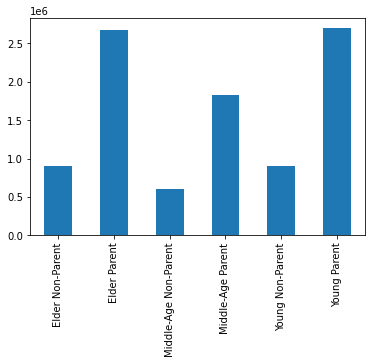

In [36]:
bar_profile_dist = df_normal_activity['profile_loc'].value_counts().sort_index().plot.bar()

## 7. Aggregate max, min, and mean variables on customer-profile level for usage frequency and expenditure

In [37]:
# Order number by profile
df_normal_activity.groupby('profile_loc').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                              mean min max
profile_loc                               
Elder Non-Parent         18.871950   1  99
Elder Parent             18.522740   1  99
Middle-Age Non-Parent    18.786487   1  99
Middle-Age Parent        18.584574   1  99
Young Non-Parent         18.526422   1  99
Young Parent             18.697518   1  99

In [38]:
# Order number by income
df_normal_activity.groupby('income_bucketed').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                        mean min max
income_bucketed                     
$100K-<$150K       18.643966   1  99
$150K+             18.791803   1  99
$50K-<$100K        18.804676   1  99
<$50K              17.585552   1  99

In [41]:
# Prices by parental status
df_normal_activity.groupby('profile_loc').agg({'prices': ['mean', 'min', 'max']})

prices           
                           mean  min   max
profile_loc                               
Elder Non-Parent       8.121798  1.0  24.2
Elder Parent           8.104594  1.0  24.2
Middle-Age Non-Parent  8.125809  1.0  24.2
Middle-Age Parent      8.101882  1.0  24.2
Young Non-Parent       8.098337  1.0  24.2
Young Parent           8.105963  1.0  24.2

In [42]:
# Prices by income
df_normal_activity.groupby('income_bucketed').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_bucketed                     
$100K-<$150K     8.241034  1.0  24.2
$150K+           8.233869  1.0  24.2
$50K-<$100K      8.188420  1.0  24.2
<$50K            7.074174  1.0  24.2

## 8. Compare customer profiles with regions and departments

In [45]:
# Customer profiles by region (the region breakdown is very similar across profiles)
pd.crosstab(df_normal_activity['profile_loc'], df_normal_activity['region'], dropna = False, normalize = 'index')

region,Midwest,Northeast,South,West
profile_loc,,,,
Elder Non-Parent,0.234137,0.179021,0.329363,0.257479
Elder Parent,0.231252,0.177296,0.331884,0.259568
Middle-Age Non-Parent,0.243929,0.164974,0.319551,0.271546
Middle-Age Parent,0.239247,0.179419,0.328531,0.252802
Young Non-Parent,0.232801,0.172965,0.344618,0.249616
Young Parent,0.231756,0.175040,0.338055,0.255149


In [46]:
# Customer profiles by department 
pd.crosstab(df_normal_activity['profile_loc'], df_normal_activity['department_id'], dropna = False, normalize = 'index')

department_id,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21
profile_loc,,,,,,,,,,,,,,,,,,,,
Elder Non-Parent,0.032416,0.000154,0.014586,0.617855,0.000129,0.001127,0.031549,0.000489,0.005670,0.000159,0.012296,0.034237,0.006779,0.016485,0.150170,0.006301,0.001759,0.035428,0.032280,0.000132
Elder Parent,0.031811,0.000161,0.014731,0.619753,0.000168,0.001138,0.031893,0.000497,0.005393,0.000171,0.012967,0.033659,0.006850,0.017038,0.149559,0.006299,0.001539,0.035177,0.031063,0.000132
Middle-Age Non-Parent,0.032833,0.000160,0.015994,0.617378,0.000195,0.001239,0.032511,0.000640,0.005173,0.000100,0.011634,0.032907,0.007076,0.016073,0.152092,0.006154,0.001652,0.035959,0.030127,0.000102
Middle-Age Parent,0.032250,0.000149,0.014641,0.617380,0.000211,0.001211,0.032328,0.000460,0.005604,0.000135,0.012617,0.033483,0.007176,0.016808,0.150222,0.006432,0.001798,0.035530,0.031420,0.000145
Young Non-Parent,0.030673,0.000203,0.014946,0.619502,0.000195,0.001173,0.031767,0.000327,0.005238,0.000151,0.012122,0.033607,0.006983,0.016794,0.151858,0.006238,0.001643,0.035293,0.031170,0.000117
Young Parent,0.031909,0.000162,0.014727,0.617752,0.000202,0.001109,0.031152,0.000602,0.005573,0.000183,0.012471,0.033571,0.007128,0.016878,0.151762,0.006364,0.001808,0.035121,0.031399,0.000127


In [8]:
# Department by region 
pd.crosstab(df_normal_activity['department_id'], df_normal_activity['region'], dropna = False, normalize = 'columns')

region,Midwest,Northeast,South,West
department_id,,,,
1,0.032349,0.031750,0.032106,0.031466
2,0.000161,0.000198,0.000138,0.000171
3,0.014821,0.014655,0.014701,0.015001
4,0.618986,0.617790,0.618702,0.617850
5,0.000182,0.000210,0.000215,0.000136
6,0.001209,0.001140,0.001135,0.001130
7,0.031697,0.032443,0.031882,0.031197
8,0.000547,0.000550,0.000514,0.000451
9,0.005452,0.005525,0.005519,0.005430


## 9. Produce charts to answer business questions

### Key question 1: What are the busiest days/hours for orders?

Text(0, 0.5, 'frequency')

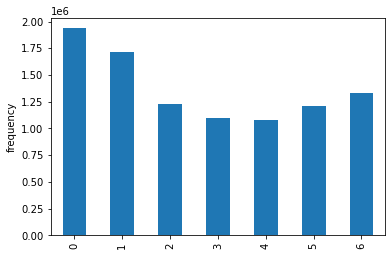

In [11]:
# Bar chart to identify busiest days of the week
bar_dow = df_normal_activity['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [14]:
# Export
bar_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow.png'))

Text(0, 0.5, 'frequency')

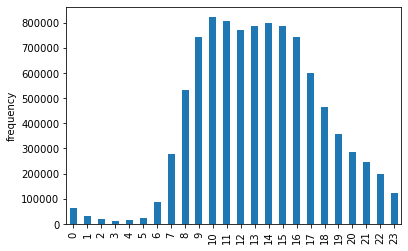

In [12]:
# Bar chart to identify busiest hours of the day
bar_hour = df_normal_activity['hour_order_placed'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [15]:
# Export
bar_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour.png'))

### Key question 2: What times of day do people spend the most money?

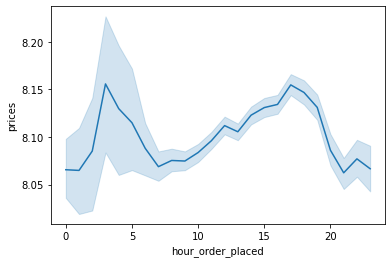

In [16]:
# line chart for prices by hour
line_price_hour = sns.lineplot(data = df_normal_activity, x = 'hour_order_placed',y = 'prices')

In [17]:
# Export
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour.png'))

In [8]:
sum_price_hour = df_normal_activity.groupby('hour_order_placed').agg({'prices' : ['sum']})

In [9]:
sum_price_hour

,prices
,sum
hour_order_placed,
0,518888.7
1,262320.5
2,151089.2
3,109662.6
4,118093.5
5,209976.2
6,720820.1
7,2253752.1


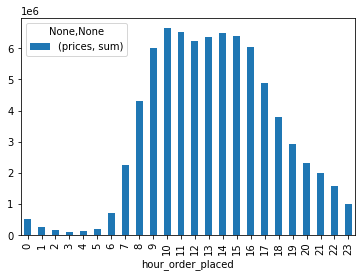

In [13]:
bar_price_hour_sum = sum_price_hour.plot.bar()

In [14]:
# Export
bar_price_hour_sum.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_hour_sum.png'))

In [67]:
# What products are being purchased before 5am?
orders_prior_5 = df_normal_activity.loc[df_normal_activity['hour_order_placed'] < 5]

In [68]:
df_normal_activity['hour_order_placed'].value_counts(dropna = False)

10    822198
11    805726
14    797574
15    786706
13    786212
12    769588
16    743024
9     742588
17    599557
8     531944
18    463839
19    358238
20    287841
7     279314
21    245426
22    197050
23    122018
6      89120
0      64333
1      32526
5      25875
2      18687
4      14526
3      13446
Name: hour_order_placed, dtype: int64

In [69]:
orders_prior_5.shape

(143518, 39)

In [71]:
# Top products are still in product dept / don't vary much from overall top products
orders_prior_5_products = orders_prior_5['product_name'].value_counts(dropna = False)

In [72]:
orders_prior_5_products.to_clipboard()

### Key question 3: Are there simpler price range groupings?

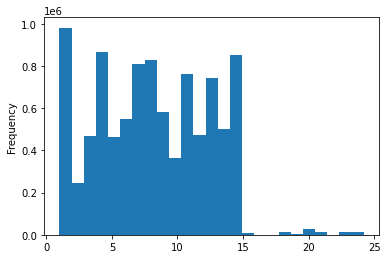

In [18]:
# price histogram
hist_price = df_normal_activity['prices'].plot.hist(bins = 25)

In [19]:
# Export
hist_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price.png'))

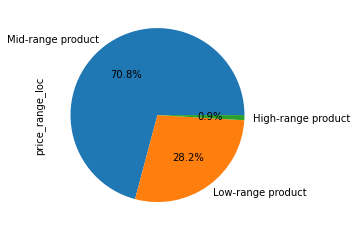

In [16]:
# pie chart of price range variable
pie_price = df_normal_activity['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%')

In [17]:
# Export
pie_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price.png'))

### Key question 4: Are there certain types of products more popular than others?

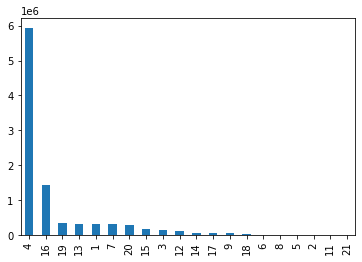

In [22]:
# department bar chart
bar_dept = df_normal_activity['department_id'].value_counts().plot.bar()

In [23]:
# Export
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept.png'))

### Key question 5: How do ordering behaviors differ by customer type? (will use customer profile vars created earlier)

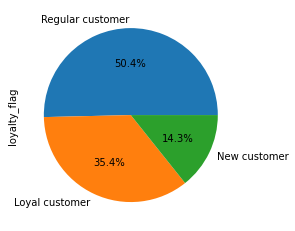

In [18]:
# A. Distribution among users in regards to brand loyalty
pie_loyalty = df_normal_activity['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')

In [19]:
# Export
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

In [40]:
# Crossing loyalty flag by customer profile
loyalty_profile_cross = pd.crosstab(df_normal_activity['profile_loc'], df_normal_activity['loyalty_flag'], dropna = False, normalize='index')

In [44]:
loyalty_profile_cross

loyalty_flag,Loyal customer,New customer,Regular customer
profile_loc,,,
Elder Non-Parent,0.360028,0.139483,0.500489
Elder Parent,0.351859,0.144788,0.503354
Middle-Age Non-Parent,0.359968,0.143747,0.496285
Middle-Age Parent,0.355795,0.142106,0.502099
Young Non-Parent,0.345987,0.146522,0.507491
Young Parent,0.352633,0.140791,0.506576


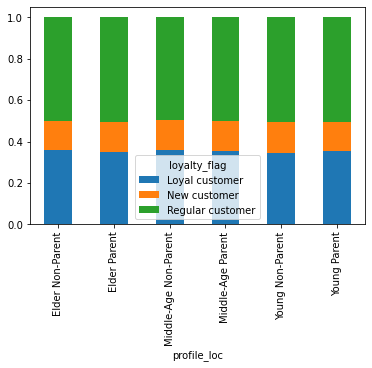

In [43]:
# Creating stacked bar of loyalty/profile cross
stacked_loyalty_profile = loyalty_profile_cross.plot(kind = 'bar', stacked = True)

In [45]:
# Export
stacked_loyalty_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_profile.png'))

In [58]:
# B. Differences in ordering habits based on loyalty status
# Crossing loyalty by spend
loyalty_spend_cross = pd.crosstab(df_normal_activity['spend_flag'], df_normal_activity['loyalty_flag'], dropna = False, normalize='index')

In [59]:
loyalty_spend_cross

loyalty_flag,Loyal customer,New customer,Regular customer
spend_flag,,,
High spender,0.355867,0.158524,0.485609
Low spender,0.353517,0.142546,0.503937


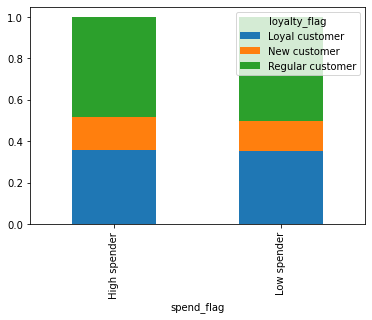

In [60]:
# Creating stacked bar of loyalty/spend
stacked_loyalty_spend = loyalty_spend_cross.plot(kind = 'bar', stacked = True)

In [61]:
# Export
stacked_loyalty_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_spend.png'))

In [62]:
# Crossing loyalty by department
loyalty_dept_cross = pd.crosstab(df_normal_activity['department_id'], df_normal_activity['loyalty_flag'], dropna = False, normalize='index')

In [63]:
loyalty_dept_cross

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,0.305144,0.165698,0.529158
2,0.246945,0.174277,0.578778
3,0.340825,0.152581,0.506594
4,0.356017,0.141329,0.502654
5,0.290990,0.157806,0.551203
6,0.346509,0.154396,0.499096
7,0.326605,0.156850,0.516545
8,0.375204,0.122150,0.502647
9,0.280998,0.176700,0.542303


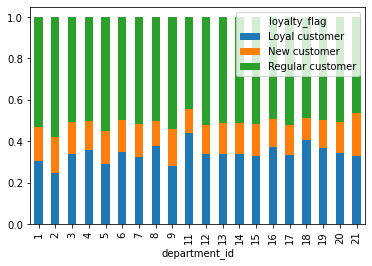

In [64]:
# Creating stacked bar of loyalty/dept
stacked_loyalty_dept = loyalty_dept_cross.plot(kind = 'bar', stacked = True)

In [67]:
# Export
stacked_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_dept.png'))

In [81]:
# C. Differences in ordering habits based on region
# Crossing loyalty by spend
region_spend_cross = pd.crosstab(df_normal_activity['spend_flag'], df_normal_activity['region'], dropna = False, normalize='index')

In [82]:
region_spend_cross

region,Midwest,Northeast,South,West
spend_flag,,,,
High spender,0.241555,0.162499,0.340081,0.255865
Low spender,0.234022,0.176229,0.333082,0.256667


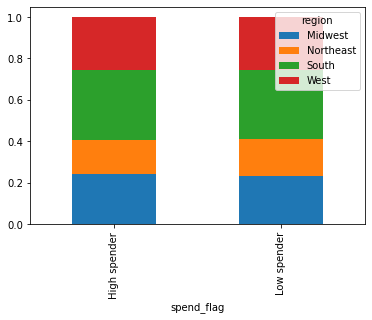

In [83]:
# Creating stacked bar of region/spend
stacked_region_spend = region_spend_cross.plot(kind = 'bar', stacked = True)

In [74]:
# Export
stacked_region_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_spend.png'))

In [75]:
# Crossing region by department
region_dept_cross = pd.crosstab(df_normal_activity['department_id'], df_normal_activity['region'], dropna = False, normalize='index')

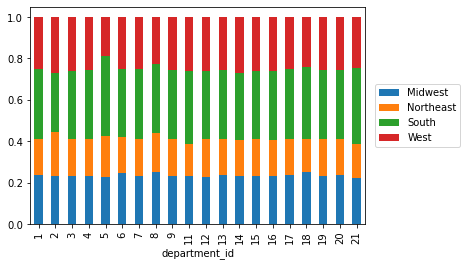

In [93]:
# Creating stacked bar of region/dept
stacked_region_dept = region_dept_cross.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.50))

In [94]:
# Export
stacked_region_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_dept.png'))

In [84]:
# D. Is there a connection between age and family status in terms of ordering habits
# Crossing customer profile by spend
profile_spend_cross = pd.crosstab(df_normal_activity['spend_flag'], df_normal_activity['profile_loc'], dropna = False, normalize='index')

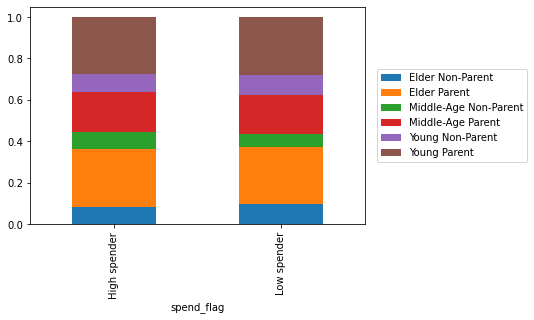

In [89]:
# Creating stacked bar of profile/spend
stacked_profile_spend = profile_spend_cross.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [95]:
# Export
stacked_profile_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_spend.png'))

In [96]:
# Crossing profile by department
profile_dept_cross = pd.crosstab(df_normal_activity['department_id'], df_normal_activity['profile_loc'], dropna = False, normalize='index')

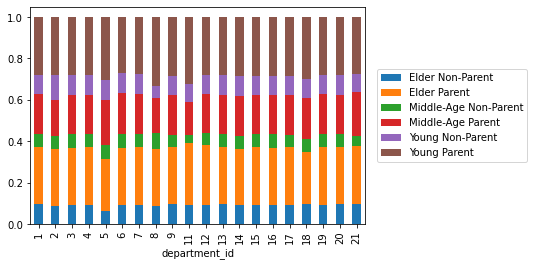

In [98]:
# Creating stacked bar of profile/dept
stacked_profile_dept = profile_dept_cross.plot(kind = 'bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [99]:
# Export
stacked_profile_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_dept.png'))

In [101]:
# E. What different classifications does the demo information suggest?
# Will review aggregated spend by profile and income

In [7]:
# Aggregated spend by customer profile
spend_profile = df_normal_activity.groupby('profile_loc').agg({'prices' : ['sum']})

In [8]:
spend_profile

,prices
,sum
profile_loc,
Elder Non-Parent,7338402.2
Elder Parent,21657979.5
Middle-Age Non-Parent,4864580.7
Middle-Age Parent,14765664.1
Young Non-Parent,7298893.8
Young Parent,21878512.8


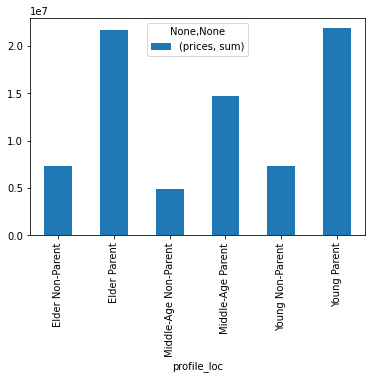

In [9]:
# Bar chart of spend by profile
bar_spend_profile = spend_profile.plot.bar()

In [113]:
# Export
bar_spend_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_profile.png'))

In [39]:
# Spend by income
spend_income = df_normal_activity.groupby('income_bucketed').agg({'prices' : ['sum']}).sort_index()

In [40]:
spend_income

,prices
,sum
income_bucketed,
1. Less than $50K,6407142.9
2. $50K to less than $100K,34665412.6
3. $100K to less than $150K,26930373.9
4. $150K or more,9801103.7


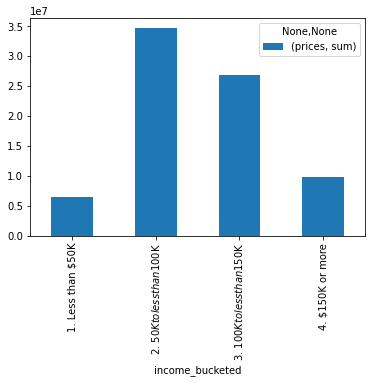

In [41]:
# Bar chart of spend by income
bar_spend_income = spend_income.plot.bar()

In [35]:
# Export
bar_spend_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_income.png'))

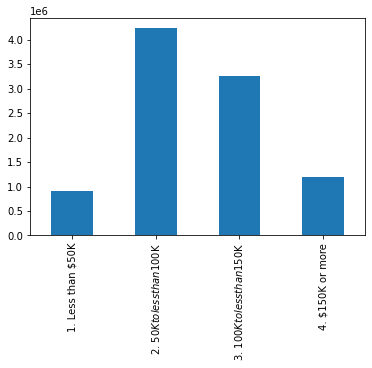

In [42]:
# Bar chart of income
bar_income = df_normal_activity['income_bucketed'].value_counts().sort_index().plot.bar()

In [43]:
# Export
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income.png'))

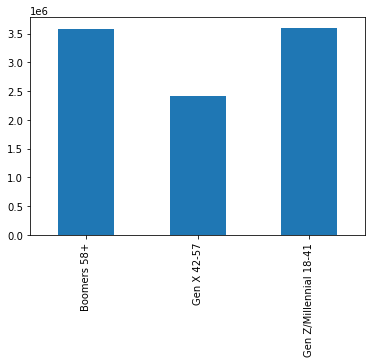

In [44]:
# Bar chart of age
bar_age = df_normal_activity['age_bucketed'].value_counts().sort_index().plot.bar()

In [45]:
# Export
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age.png'))

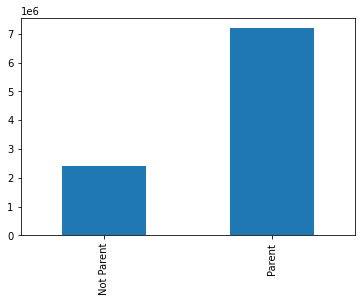

In [46]:
# Bar chart of parental status
bar_parents = df_normal_activity['parents'].value_counts().sort_index().plot.bar()

In [ ]:
# Export
bar_parents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parents.png'))

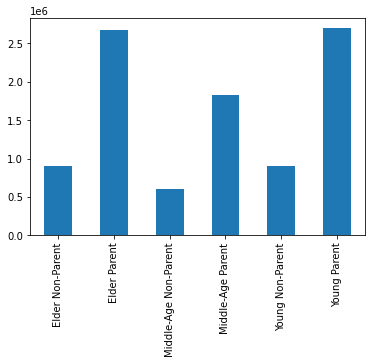

In [48]:
# Bar profile
bar_profile = df_normal_activity['profile_loc'].value_counts().sort_index().plot.bar()

In [49]:
# F. What differences can you find in ordering habits of different customer profiles?

In [64]:
# Looking at average price per profile group
price_profile = df_normal_activity.groupby('profile_loc').agg({'prices' : ['mean','sum']}).sort_index()

In [65]:
price_profile

prices            
                           mean         sum
profile_loc                                
Elder Non-Parent       8.121798   7338402.2
Elder Parent           8.104594  21657979.5
Middle-Age Non-Parent  8.125809   4864580.7
Middle-Age Parent      8.101882  14765664.1
Young Non-Parent       8.098337   7298893.8
Young Parent           8.105963  21878512.8

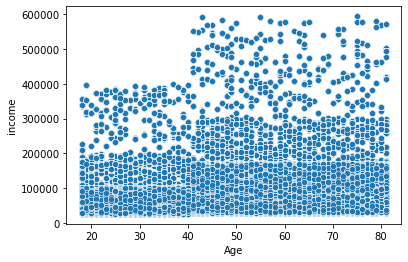

In [58]:
# Scatterplot age by income
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_normal_activity)

In [59]:
# Export
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

In [62]:
# total orders per profile group
orders_profile = df_normal_activity.groupby('profile_loc').agg({'order_number' : ['sum','mean']}).sort_index()

In [63]:
orders_profile

order_number           
                               sum       mean
profile_loc                                  
Elder Non-Parent          17051637  18.871950
Elder Parent              49498486  18.522740
Middle-Age Non-Parent     11246681  18.786487
Middle-Age Parent         33870349  18.584574
Young Non-Parent          16697549  18.526422
Young Parent              50465799  18.697518

## Export Data

In [120]:
df_normal_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity_subset.pkl'))